In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 


In [2]:
import os
from os.path import join
import pandas as pd
from src.config import RESULTS, FIGURES_DIR, ROOT_DIR
from src.calculate_AF import plot_af,calculate_af
#ref_fa = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/fasta/genome.fa"
ref_fa="/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta"
maxBP = 16571


Project Directory: /data2/mito_lineage


In [3]:
from matplotlib_venn import venn2


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from mplh import cluster_help

fig_utils from mplh


In [6]:
os.chdir(ROOT_DIR)

## Files setup

In [7]:
indir=join(RESULTS,"mttrace")
mapq = "mapq_30"
num_reads = 200
flt3 = "CD34_Flt3L_mt_PolydT"
wt = "CD34_mt_PolydT"



flt3_indir = join(indir, flt3,"mapq_30")
wt_indir = join(indir, wt,"mapq_30")

# sc_coverage_flt3_f = join(flt3_indir,"scPileup_concat_200",flt3+"_200_all.coverage.txt.gz")
# sc_coverage_wt_f = join(wt_indir,"scPileup_concat_200",wt + "_200_all.coverage.txt.gz")

coverage_flt3_dir = join(flt3_indir,flt3+"_scPileup_200")
coverage_wt_dir = join(wt_indir,wt+"_scPileup_200")

concat_flt3_dir = join(flt3_indir,"scPileup_concat_200")
concat_wt_dir = join(wt_indir,"scPileup_concat_200")

In [8]:
outdir = join(indir, "lineage_trace/CD34_mt_polydT")
if not os.path.exists(outdir):
    os.makedirs(outdir)
outdir

'/data2/mito_lineage/data/processed/mttrace/lineage_trace/CD34_mt'

### Get CD34 with and without Flt3L, first using polydT+mt
### Create allele frequency matrix for both, but add metadata for each cell about which experiment it came from
### Cluster and look

### Additional requirements is to remove poor-quality variants of BQ- see if Erick has the code of the mixture model

In [9]:
print(ref_fa)
print(maxBP)
print(coverage_wt_dir)
print(concat_wt_dir)

/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta
16571
/data2/mito_lineage/data/processed/mttrace/CD34_mt_PolydT/mapq_30/CD34_mt_PolydT_scPileup_200
/data2/mito_lineage/data/processed/mttrace/CD34_mt_PolydT/mapq_30/scPileup_concat_200


In [10]:
wt_AF_by_cell, wt_af, wt_bq_df, wt_nt_df = calculate_af(coverage_wt_dir, concat_wt_dir, ref_fasta=ref_fa,AF_F=None, maxBP=maxBP, topN=500, min_cells=100, min_reads=10)

no alt count 5331
Number of positions to keep : 465
Number of cells to keep : 500


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
97it [00:00, 967.51it/s]

105it [00:00, 1044.05it/s]
106it [00:00, 1050.68it/s]
99it [00:00, 988.89it/s]
99it [00:00, 986.76it/s]
0it [00:00, ?it/s]
110it [00:00, 1090.12it/s]
189it [00:00, 951.40it/s]

177it [00:00, 919.26it/s] 

163it [00:00, 849.35it/s] 
171it [00:00, 887.99it/s]

147it [00:00, 1462.65it/s]
257it [00:00, 848.76it/s]
244it [00:00, 826.03it/s]
212it [00:00, 667.12it/s]
234it [00:00, 798.79it/s]
224it [00:00, 709.37it/s]
246it [00:00, 840.36it/s]

287it [00:00, 1441.17it/s]
345it [00:00, 857.21it/s]
317it [00:00, 794.01it/s]
287it [00:00, 689.21it/s]

278it [00:00, 642.73it/s]
363it [00:00, 916.86it/s]
451it [00:00, 931.22it/s]
355it [00:00, 902.71it/s]
451it [00:00, 1481.13it/s]
1it [00:01,  1.45s/it]
416it [00:00, 842.90it/s]
386it [00:00, 758.17it/s]
0it [00:00, ?it/s]

389it [00:00, 735.33it/s]
0it [00:00, ?it/s]
451it [00:00, 884.44it/s]
451it [00:00

0it [00:00, ?it/s]41it/s] 
427it [00:00, 969.56it/s]
451it [00:00, 967.72it/s]



259it [00:00, 844.52it/s]]

227it [00:00, 1082.16it/s]
343it [00:00, 873.26it/s]
451it [00:00, 915.90it/s]
4it [00:04,  1.16s/it]
451it [00:00, 967.58it/s]][A


5it [00:03,  1.23it/s]
363it [00:00, 928.44it/s]
0it [00:00, ?it/s]
451it [00:00, 1032.97it/s]

105it [00:00, 1048.86it/s]

407it [00:00, 1002.28it/s]
162it [00:00, 1612.89it/s]
451it [00:00, 1043.35it/s][A
5it [00:04,  1.19it/s]
442it [00:00, 1102.36it/s]
451it [00:00, 868.88it/s]]



5it [00:04,  1.17it/s]
417it [00:00, 849.95it/s]
402it [00:00, 1017.61it/s]
451it [00:00, 936.57it/s]

392it [00:00, 965.09it/s]
124it [00:00, 1238.23it/s]
442it [00:00, 830.89it/s]
365it [00:00, 897.91it/s]

362it [00:00, 1116.56it/s]
332it [00:00, 1069.91it/s]
451it [00:00, 841.04it/s]

451it [00:00, 1031.87it/s]


5it [00:04,  1.11it/s]t/s]
451it [00:00, 1166.39it/s]
451it [00:00, 1017.90it/s]
5it [00:04,  1.11it/s]
215it [00:00, 1060.10it/s]
329it [00:00, 1629.5

0it [00:00, ?it/s]
0it [00:00, ?it/s]
408it [00:00, 1035.13it/s]
391it [00:00, 1202.26it/s]
355it [00:00, 1145.33it/s]
305it [00:00, 928.98it/s]
336it [00:00, 1106.63it/s]
328it [00:00, 1015.86it/s]

0it [00:00, ?it/s].05it/s]
451it [00:00, 1015.58it/s]
451it [00:00, 1020.91it/s]
9it [00:06,  1.54it/s]

306it [00:00, 1010.92it/s]
10it [00:06,  1.64it/s]
0it [00:00, ?it/s]

451it [00:00, 1234.59it/s]

67it [00:00, 668.95it/s]

139it [00:00, 1389.33it/s]
451it [00:00, 1124.60it/s]

385it [00:00, 960.17it/s]]

9it [00:06,  1.50it/s]
451it [00:00, 1140.12it/s]

9it [00:06,  1.58it/s]/s]
438it [00:00, 1072.00it/s]

0it [00:00, ?it/s]
444it [00:00, 1099.62it/s]
130it [00:00, 1293.70it/s]
451it [00:00, 1128.19it/s]
451it [00:00, 1165.22it/s]
451it [00:00, 1058.82it/s]

417it [00:00, 977.72it/s]
10it [00:06,  1.69it/s]/s]
10it [00:06,  1.79it/s]
451it [00:00, 1005.88it/s]
9it [00:06,  1.43it/s]
451it [00:00, 1064.15it/s]

10it [00:06,  1.57it/s][A
383it [00:00, 923.81it/s] 
10it [00:06,  1.73i

377it [00:00, 1234.52it/s]A
98it [00:00, 977.06it/s]
215it [00:00, 1094.86it/s]

305it [00:00, 999.09it/s] 
392it [00:00, 978.67it/s]
141it [00:00, 1409.50it/s]
203it [00:00, 1026.36it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s].24it/s]
258it [00:00, 1256.28it/s]
381it [00:00, 914.43it/s]]

451it [00:00, 1030.87it/s]
451it [00:00, 941.99it/s]

14it [00:09,  1.81it/s]
305it [00:00, 1029.37it/s]
450it [00:00, 1109.89it/s]
451it [00:00, 1148.72it/s]
15it [00:09,  1.66it/s]

14it [00:09,  1.66it/s]/s]

442it [00:00, 1073.04it/s]

408it [00:00, 980.72it/s]]
451it [00:00, 1209.65it/s]
110it [00:00, 1099.02it/s]
451it [00:00, 1087.02it/s]


234it [00:00, 1085.91it/s]

451it [00:00, 1048.33it/s][A
451it [00:00, 1124.98it/s]
14it [00:08,  1.81it/s]

225it [00:00, 1045.27it/s]
451it [00:00, 977.18it/s]]

451it [00:00, 1030.76it/s]
14it [00:09,  1.76it/s]
451it [00:00, 1030.48it/s]
14it [00:09,  1.75it/s]
0it [00:00, ?it/s]
307it [00:00, 1474.56it/s]
350it [00:00, 1126.55it/s]
284it [00:00, 1331.09

In [11]:
((wt_bq_df>0).sum(axis=1)).where(lambda x: x>1).dropna().index

Int64Index([   10,    17,    23,    39,    46,    48,    64,    73,    89,
              111,
            ...
            16382, 16383, 16386, 16387, 16456, 16457, 16459, 16460, 16496,
            16519],
           dtype='int64', length=11235)

In [12]:
print(f"Number of positions with heteroplasmy fraction above 0: {(wt_AF_by_cell>0).any(axis=0).sum()}")

Number of positions with heteroplasmy fraction above 0: 430


In [13]:
f = plt.figure()
bq_vals = wt_bq_df.values.flatten()
plt.hist(bq_vals[bq_vals>0])
plt.title("Base Quality for all variants (removing 0s) ")
plt.savefig(join(outdir, "wt_base_quality.png"))

plt.figure()
plt.hist(wt_af["Alternative BQ"])
plt.title("Base Quality Score of alternative alleles")
plt.xlabel("Base Quality (Higher is better)")
plt.ylabel("Count")
plt.savefig(join(outdir, "wt_base_quality_altAllele.png"))


f = plt.figure()
af_vals = wt_AF_by_cell.values.flatten()
plt.hist(af_vals[af_vals>0])
plt.title("Heteroplasmy of alternative allele")
plt.xlabel("Heteroplasmy fraction in variants in wt (removing 0s)")
plt.savefig(join(outdir, "wt_heteroplasmy_values.png"))


## flt3

In [14]:
flt3_AF_by_cell, flt3_af, flt3_bq_df, flt3_nt_df = calculate_af(coverage_flt3_dir, concat_flt3_dir, ref_fasta=ref_fa,AF_F=None, maxBP=maxBP, topN=500, min_cells=100, min_reads=10)

no alt count 2142
Number of positions to keep : 1243
Number of cells to keep : 500


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]



0it [00:00, ?it/s]
0it [00:00, ?it/s]
120it [00:00, 1195.28it/s]
82it [00:00, 816.98it/s]

112it [00:00, 1110.77it/s]

113it [00:00, 1120.54it/s]
122it [00:00, 1215.00it/s]
105it [00:00, 1047.53it/s]


0it [00:00, ?it/s]
0it [00:00, ?it/s]


130it [00:00, 1294.87it/s]
109it [00:00, 1082.47it/s]
85it [00:00, 838.54it/s]
282it [00:00, 1296.83it/s]
228it [00:00, 940.82it/s]


0it [00:00, ?it/s].22it/s]
270it [00:00, 1347.43it/s]


0it [00:00, ?it/s].00it/s]
269it [00:00, 1174.31it/s]


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]



69it [00:00, 688.37it/s]s]
111it [00:00, 1106.52it/s]


0it [00:00, ?it/s].33it/s]

178it [00:00, 920.25it/s] 
169it [00:00, 837.70it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
447it [00:00, 1383.84it/s]
343it [00:00, 993.62it/s]
399it [00:00, 1253.34it/s]


424it [00:00, 1379.

1112it [00:01, 1058.57it/s]

1079it [00:01, 1017.16it/s]
123it [00:00, 1221.91it/s]
1242it [00:01, 1117.92it/s]
1242it [00:01, 1046.70it/s]

2it [00:02,  1.29s/it]


106it [00:00, 1051.47it/s]]
112it [00:00, 1116.18it/s]
232it [00:00, 1160.20it/s]
139it [00:00, 1382.75it/s]
1198it [00:01, 1001.36it/s]

0it [00:00, ?it/s]8.84it/s]


1242it [00:00, 1256.08it/s]
0it [00:00, ?it/s]9.21it/s]
216it [00:00, 1066.49it/s]

2it [00:02,  1.40s/it]
2it [00:02,  1.30s/it]
262it [00:00, 1229.60it/s]
921it [00:00, 1009.64it/s][A
107it [00:00, 1062.61it/s]
115it [00:00, 1148.36it/s]
1242it [00:01, 1103.74it/s]
1059it [00:01, 1031.74it/s]
2it [00:02,  1.33s/it]t/s]

1242it [00:01, 1058.92it/s][A
2it [00:02,  1.32s/it]
1206it [00:01, 1080.93it/s]
244it [00:00, 1218.04it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s].42it/s]


1163it [00:01, 870.79it/s]]
220it [00:00, 1100.87it/s]
337it [00:00, 1121.01it/s]

220it [00:00, 1074.76it/s]
1242it [00:01, 1064.36it/s]

1159it [00:01, 1007.51it/s]
428it [00:00, 1334

1242it [00:01, 1091.39it/s]
4it [00:04,  1.19s/it]
209it [00:00, 1045.20it/s]

1054it [00:01, 1127.71it/s]

0it [00:00, ?it/s]
0it [00:00, ?it/s]
843it [00:00, 1211.50it/s]
869it [00:00, 1070.41it/s]

1166it [00:01, 1087.58it/s]
1203it [00:01, 981.99it/s] 
136it [00:00, 1353.67it/s]
1166it [00:01, 1091.01it/s]

597it [00:00, 974.75it/s] 
1196it [00:01, 973.74it/s] 
1092it [00:01, 1090.65it/s]
0it [00:00, ?it/s]
1098it [00:00, 1096.35it/s]
0it [00:00, ?it/s]
1242it [00:01, 1043.05it/s][A
4it [00:04,  1.26s/it]

935it [00:00, 924.50it/s]]]
4it [00:04,  1.27s/it]
1067it [00:00, 1028.69it/s]
4it [00:04,  1.24s/it]

1242it [00:01, 1001.06it/s][A

4it [00:04,  1.25s/it]

1242it [00:01, 1018.12it/s][A
4it [00:04,  1.24s/it]it/s]


316it [00:00, 1051.67it/s]
1174it [00:01, 866.81it/s] 


130it [00:00, 1295.11it/s]
982it [00:00, 1085.07it/s]
1168it [00:01, 1096.42it/s]
845it [00:00, 1021.47it/s]
273it [00:00, 1355.09it/s]

688it [00:00, 952.83it/s]s]
0it [00:00, ?it/s]
958it [00:00, 1078.43it/s

1176it [00:01, 1121.66it/s]
1145it [00:01, 1087.79it/s]
1085it [00:00, 1245.01it/s]
1088it [00:01, 1048.08it/s]
1048it [00:00, 1129.08it/s]
762it [00:00, 1104.91it/s]]
5it [00:06,  1.19s/it]


1116it [00:01, 1105.59it/s]
1242it [00:01, 1089.68it/s]
1242it [00:01, 1201.50it/s]


1242it [00:01, 1160.25it/s][A

940it [00:00, 1146.62it/s]

883it [00:00, 1111.79it/s]
0it [00:00, ?it/s].66it/s]

110it [00:00, 1093.16it/s]]
337it [00:00, 851.17it/s]

0it [00:00, ?it/s]
1028it [00:00, 1062.65it/s][A
167it [00:00, 1666.45it/s]


990it [00:00, 1096.24it/s]]
5it [00:06,  1.22s/it]


1242it [00:01, 1213.58it/s]
5it [00:06,  1.21s/it]
1216it [00:01, 1263.72it/s]
1222it [00:01, 1120.52it/s]

912it [00:00, 1198.15it/s]]


0it [00:00, ?it/s]
1240it [00:01, 1131.93it/s]

0it [00:00, ?it/s].07it/s]
1242it [00:01, 1110.46it/s][A
1242it [00:01, 1199.49it/s]
1242it [00:01, 1083.98it/s]
5it [00:06,  1.21s/it]

5it [00:06,  1.26s/it]t/s]
992it [00:00, 1104.69it/s]
995it [00:00, 1121.90it/s]
103it [00:00, 102

729it [00:00, 1414.24it/s]

976it [00:00, 1089.12it/s]
0it [00:00, ?it/s]
1242it [00:01, 1150.61it/s]

7it [00:08,  1.20s/it]t/s]
690it [00:00, 1105.98it/s]]
7it [00:08,  1.20s/it]
0it [00:00, ?it/s]
231it [00:00, 1141.93it/s]
1076it [00:01, 911.88it/s]


1209it [00:01, 1072.92it/s]
551it [00:00, 1102.31it/s]
380it [00:00, 1295.63it/s]
0it [00:00, ?it/s]
953it [00:00, 1198.07it/s]
0it [00:00, ?it/s]
914it [00:00, 1066.80it/s]

1162it [00:00, 1307.84it/s]
772it [00:00, 1029.11it/s]]

0it [00:00, ?it/s].91it/s]]
7it [00:08,  1.22s/it]

1242it [00:01, 1127.76it/s][A
7it [00:08,  1.21s/it]
1196it [00:01, 1072.27it/s]

1060it [00:01, 1045.96it/s]

1242it [00:00, 1296.40it/s]


417it [00:00, 1043.80it/s]

113it [00:00, 1120.55it/s]
956it [00:00, 1268.28it/s]
817it [00:00, 1149.81it/s]
1242it [00:01, 1068.75it/s]
7it [00:08,  1.21s/it]
149it [00:00, 1481.25it/s]
591it [00:00, 1150.72it/s]
391it [00:00, 1248.26it/s]
1242it [00:01, 1049.49it/s]
7it [00:08,  1.23s/it]
644it [00:00, 1044.24it/s]


450it [00:00, 1116.81it/s]
1242it [00:01, 1127.44it/s]
9it [00:10,  1.18s/it]
0it [00:00, ?it/s]
1210it [00:01, 1177.96it/s]
0it [00:00, ?it/s]
1172it [00:00, 1226.72it/s]
875it [00:00, 1098.43it/s]
627it [00:00, 998.58it/s] 
0it [00:00, ?it/s]

822it [00:00, 1049.60it/s]

766it [00:00, 1186.52it/s]
1122it [00:00, 1432.56it/s]
0it [00:00, ?it/s]

230it [00:00, 1142.88it/s]]
9it [00:10,  1.20s/it]
910it [00:00, 1150.18it/s]
961it [00:00, 1126.18it/s]
109it [00:00, 1081.50it/s]
341it [00:00, 1137.54it/s]
929it [00:00, 1327.12it/s]

196it [00:00, 1018.11it/s]
1027it [00:00, 1189.45it/s]
0it [00:00, ?it/s]

811it [00:00, 1118.14it/s]
449it [00:00, 1438.27it/s]
582it [00:00, 1424.36it/s]
1242it [00:00, 1262.45it/s]

9it [00:10,  1.17s/it]it/s]
560it [00:00, 1110.62it/s]
808it [00:00, 1120.25it/s]
168it [00:00, 1674.15it/s]
163it [00:00, 1621.87it/s]
998it [00:00, 1133.40it/s]
715it [00:00, 946.85it/s]
130it [00:00, 1297.39it/s]



951it [00:00, 1199.33it/s]


1242it [00:00, 1359.94it/s]

87

1242it [00:01, 1052.77it/s][A
1184it [00:01, 1082.20it/s]
10it [00:12,  1.23s/it]
251it [00:00, 845.81it/s]

505it [00:00, 976.54it/s] 

798it [00:00, 1114.95it/s]

762it [00:00, 1000.29it/s]

1069it [00:00, 992.65it/s]
568it [00:00, 1028.45it/s]
110it [00:00, 1084.74it/s]
0it [00:00, ?it/s]
456it [00:00, 1120.06it/s]
1242it [00:01, 1018.60it/s]


882it [00:00, 1125.42it/s]
0it [00:00, ?it/s]1.58it/s]
11it [00:12,  1.13s/it]
215it [00:00, 1049.97it/s]
104it [00:00, 1037.32it/s]

742it [00:00, 1034.13it/s]
929it [00:00, 1133.28it/s]
813it [00:00, 987.58it/s]

1031it [00:01, 946.97it/s]
0it [00:00, ?it/s]
814it [00:00, 1062.36it/s]
1126it [00:01, 1000.52it/s]
0it [00:00, ?it/s]
339it [00:00, 853.23it/s]
584it [00:00, 909.17it/s]
991it [00:00, 1080.13it/s]

298it [00:00, 980.24it/s] 
424it [00:00, 1059.31it/s]

223it [00:00, 1097.64it/s]
900it [00:00, 999.07it/s] 
0it [00:00, ?it/s]
108it [00:00, 1073.76it/s]
544it [00:00, 1034.38it/s]
1172it [00:01, 923.99it/s]
658it [00:00, 902.90it/s] 

521it [00:00, 809.56it/s]A
12it [00:15,  1.33s/it]
1132it [00:01, 795.49it/s]

321it [00:00, 746.42it/s]

311it [00:00, 1062.30it/s]
1005it [00:01, 819.22it/s]

896it [00:01, 707.88it/s]
1142it [00:01, 911.20it/s]
575it [00:00, 949.56it/s]
865it [00:00, 791.33it/s]

512it [00:00, 843.98it/s]]


207it [00:00, 963.09it/s]

372it [00:00, 701.00it/s]
969it [00:01, 814.83it/s]]
715it [00:00, 838.57it/s]

0it [00:00, ?it/s]
809it [00:00, 1021.37it/s]

121it [00:00, 1202.81it/s][A

1085it [00:01, 962.49it/s]


746it [00:00, 837.48it/s]
630it [00:00, 875.87it/s]

1217it [00:01, 811.08it/s]


374it [00:00, 931.88it/s]s]

1089it [00:01, 823.47it/s]
986it [00:01, 754.99it/s]

107it [00:00, 1065.05it/s]
1242it [00:01, 834.72it/s]
633it [00:00, 927.65it/s]



302it [00:00, 958.17it/s]]

452it [00:00, 1100.94it/s]

806it [00:00, 857.71it/s]]


1242it [00:01, 912.31it/s]

1050it [00:01, 786.36it/s]

13it [00:15,  1.26s/it]s]]
833it [00:00, 846.75it/s]



1242it [00:01, 965.36it/s]

13it [00:15,  1.25

1108it [00:01, 941.82it/s][A

658it [00:00, 991.05it/s] 
855it [00:00, 915.10it/s]]
855it [00:01, 795.25it/s]
226it [00:00, 1155.89it/s]
1242it [00:01, 963.52it/s][A
0it [00:00, ?it/s]



231it [00:00, 1066.75it/s]
775it [00:00, 941.14it/s]A

776it [00:00, 841.98it/s]
1134it [00:01, 846.43it/s]


163it [00:00, 837.17it/s]s]

456it [00:00, 878.43it/s]]

245it [00:00, 1220.14it/s]



1154it [00:01, 875.29it/s]
959it [00:00, 1149.57it/s]
1203it [00:01, 939.58it/s]
1213it [00:01, 935.02it/s]
1242it [00:01, 1065.14it/s]A
15it [00:18,  1.27s/it]
958it [00:01, 853.01it/s]

360it [00:00, 1205.47it/s]
1009it [00:01, 981.31it/s]
1242it [00:01, 967.30it/s]
1242it [00:01, 832.41it/s]
790it [00:00, 1061.86it/s]

15it [00:18,  1.30s/it]
373it [00:00, 1152.23it/s]
905it [00:00, 1026.06it/s]

861it [00:00, 842.79it/s]

1221it [00:01, 833.97it/s]

252it [00:00, 851.48it/s]
1242it [00:01, 837.16it/s]

1107it [00:01, 1136.35it/s]
349it [00:00, 1157.61it/s]

710it [00:00, 1215.01it/s]
1106it [00:01, 1229.

In [15]:
f = plt.figure()
bq_vals = flt3_bq_df.values.flatten()
plt.hist(bq_vals[bq_vals>0])
plt.title("Base Quality for all variants (removing 0s) ")
plt.savefig(join(outdir, "flt3_base_quality.png"))

plt.figure()
plt.hist(flt3_af["Alternative BQ"])
plt.title("Base Quality Score of alternative alleles")
plt.xlabel("Base Quality (Higher is better)")
plt.ylabel("Count")
plt.savefig(join(outdir, "flt3_base_quality_altAllele.png"))


f = plt.figure()
af_vals = flt3_AF_by_cell.values.flatten()
plt.hist(af_vals[af_vals>0])
plt.title("Heteroplasmy of alternative allele")
plt.xlabel("Heteroplasmy fraction in variants in flt3 (removing 0s)")
plt.savefig(join(outdir, "flt3_heteroplasmy_values.png"))


## Merge the two 

In [16]:
flt3_AF_by_cell.index = flt3_AF_by_cell.index+"_flt3"
wt_AF_by_cell.index = wt_AF_by_cell.index+"_wt"


In [17]:
all_cells = pd.concat((wt_AF_by_cell,flt3_AF_by_cell) ,axis=1)


/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [18]:
all_cells_var_overlap = pd.concat((wt_AF_by_cell,flt3_AF_by_cell) ,axis=0, join='inner')
overlap_variants = all_cells_var_overlap.columns.values
all_cells_var_overlap


,1673C,1674C,1677A,1678A,1680C,1681T,1682A,1683A,1684A,1685A,...,9506A,9507A,9508A,9509G,9510C,9511T,9512A,14804T,14805T,14806G
CTACACCAGGCTCAGA-1_wt,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTTAAGCCAAGTACCT-1_wt,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CACATTTTCAACACAC-1_wt,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCGTGGATCTACCAGA-1_wt,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTGCGGTTCTAACCGA-1_wt,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGAGCACCACTACAGT-1_flt3,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTCACAATCTTAGCCC-1_flt3,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGGTTAACACTCGACG-1_flt3,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTGATAGTCCTCAATT-1_flt3,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
venn2([set(wt_AF_by_cell.columns.values),set(flt3_AF_by_cell.columns.values)],set_labels=["WT","Flt3"])
plt.title("Overlap of called variants")
plt.savefig(join(outdir,"overlap_variants_with_without_ligand.png"))

## Plot the lineage tracing 

### With only the overlapping variants

In [20]:
all_cells_var_overlap = all_cells_var_overlap.drop((all_cells_var_overlap==0).all(axis=0).where(lambda x: x==True).dropna().index,axis=1)

all_cells_var_overlap = all_cells_var_overlap.drop((all_cells_var_overlap==0).all(axis=1).where(lambda x: x==True).dropna().index,axis=0)

In [29]:
pd.DataFrame(index=flt3_AF_by_cell.index, data={"Sample":["Flt3"]*flt3_AF_by_cell.index.shape[0]})

,Sample
TCTTTCCCAAACAACA-1_flt3,Flt3
TGCTACCTCTTGAGGT-1_flt3,Flt3
CGTCTACGTTAGGGTG-1_flt3,Flt3
GGGCACTTCAACTCTT-1_flt3,Flt3
CCAATCCAGTTGTAGA-1_flt3,Flt3
...,...
CGAGCACCACTACAGT-1_flt3,Flt3
GTCACAATCTTAGCCC-1_flt3,Flt3
CGGTTAACACTCGACG-1_flt3,Flt3
CTGATAGTCCTCAATT-1_flt3,Flt3


In [32]:

row_meta = pd.concat((pd.DataFrame(index=flt3_AF_by_cell.index, data={"Sample":["Flt3"]*flt3_AF_by_cell.index.shape[0]}),
           pd.DataFrame(index= wt_AF_by_cell.index, data={"Sample":["wt"]*wt_AF_by_cell.index.shape[0]})))
row_meta = row_meta.loc[all_cells_var_overlap.index]
row_meta

,Sample
CTACACCAGGCTCAGA-1_wt,wt
GTTAAGCCAAGTACCT-1_wt,wt
CACATTTTCAACACAC-1_wt,wt
CCGTGGATCTACCAGA-1_wt,wt
GTGCGGTTCTAACCGA-1_wt,wt
...,...
CGAGCACCACTACAGT-1_flt3,Flt3
GTCACAATCTTAGCCC-1_flt3,Flt3
CGGTTAACACTCGACG-1_flt3,Flt3
CTGATAGTCCTCAATT-1_flt3,Flt3


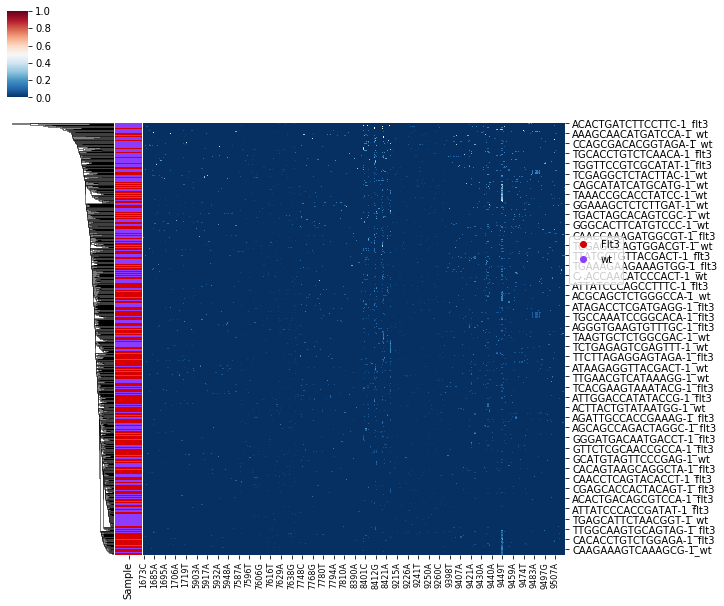

In [36]:
%matplotlib inline
cluster_help.plot_cluster(df=all_cells_var_overlap, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.savefig(join(outdir,"lineage_OnlyoverlapVariants.png"))

### With all variants

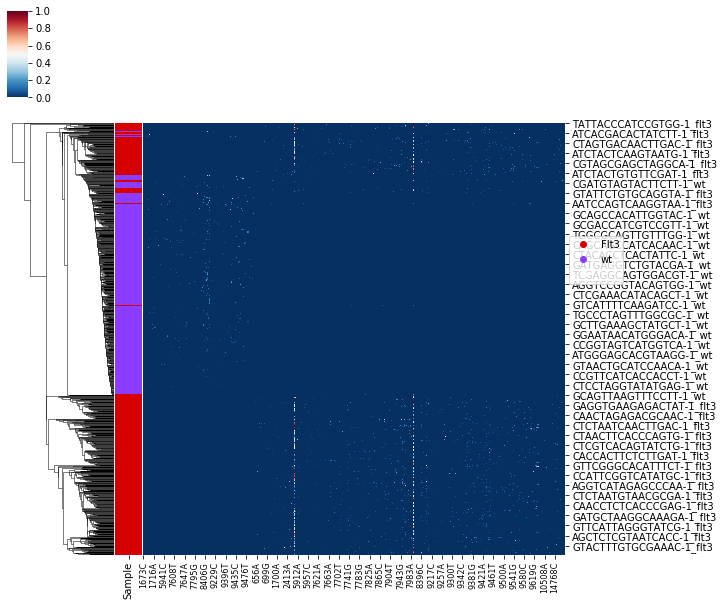

In [37]:
all_cells = all_cells.fillna(0)
all_cells = all_cells.drop((all_cells==0).all(axis=0).where(lambda x: x==True).dropna().index,axis=1)

all_cells = all_cells.drop((all_cells==0).all(axis=1).where(lambda x: x==True).dropna().index,axis=0)

# row_meta = pd.concat((pd.DataFrame(index=flt3_cell, data={"Sample":["Flt3"]*flt3_cell.shape[0]}),
#            pd.DataFrame(index=wt_cell, data={"Sample":["wt"]*wt_cell.shape[0]})))
# row_meta = row_meta.loc[all_cells.index]

row_meta = pd.concat((pd.DataFrame(index=flt3_AF_by_cell.index, data={"Sample":["Flt3"]*flt3_AF_by_cell.index.shape[0]}),
           pd.DataFrame(index= wt_AF_by_cell.index, data={"Sample":["wt"]*wt_AF_by_cell.index.shape[0]})))
row_meta = row_meta.loc[all_cells.index]
row_meta


cluster_help.plot_cluster(df=all_cells, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.savefig(join(outdir,"lineage_AllVariants.png"))

## Plot number of overlapping positions from Flt3 and without

### Here we compare the rest of sequencing techniques done and see if we see the same variants, this ensuring the differences are consistent across the techniques and not technical noise.